In [1]:
using DrWatson
@quickactivate :SwARExperiments

In [3]:
] add GraphPPL

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
┌ Warning: The active manifest file at `/Users/apodusenko/Julia/SWAR/Manifest.toml` has an old format that is being maintained.
│ To update to the new format run `Pkg.upgrade_manifest()` which will upgrade the format without re-resolving.
└ @ Pkg.Types /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.7/Pkg/src/manifest.jl:287
    Updating `~/Julia/SWAR/Project.toml`
  [b3f8163a] + GraphPPL v2.2.0
  No Changes to `~/Julia/SWAR/Manifest.toml`
┌ Warning: The active manifest file is an older format with no julia version entry. Dependencies may have been resolved with a different julia version.
└ @ nothing /Users/apodusenko/Julia/SWAR/Manifest.toml:0
Precompiling project...
  ✓ ElasticArrays
  ✓ GPUArraysCore
  ✓ HDF5_jll
  ✓ Random123
  ✓ Interpolations
  ✓ GPUArrays
  ✓ GaussianProcesses
  ✓ HDF5
  ✓ Dagger
  ✓ H5Zblosc
  ✓ GPUCompiler
  ✓ ImageTransformations
  ✓ JLD
 

In [4]:
] rm Rocket

    Updating `~/Julia/SWAR/Project.toml`
  [df971d30] - Rocket v1.4.0
  No Changes to `~/Julia/SWAR/Manifest.toml`


In [5]:
] add Rocket

   Resolving package versions...
    Updating `~/Julia/SWAR/Project.toml`
  [df971d30] + Rocket v1.4.0
  No Changes to `~/Julia/SWAR/Manifest.toml`


In [6]:
using Rocket
using ReactiveMP
using GraphPPL
using Distributions
using Plots
using Random
using Parameters
using LinearAlgebra
import ProgressMeter

In [7]:
using Plots
pgfplotsx()
push!(PGFPlotsX.CUSTOM_PREAMBLE, raw"\usepgfplotslibrary{fillbetween}");

In [8]:
function ar_ssm(series, order)
    inputs = [reverse!(series[1:order])]
    outputs = [series[order + 1]]
    for x in series[order+2:end]
        push!(inputs, vcat(outputs[end], inputs[end])[1:end-1])
        push!(outputs, x)
    end
    return inputs, outputs
end

ar_ssm (generic function with 1 method)

In [9]:
using WAV
signal, fs = WAV.wavread("../data/btb.wav")
# signal = signal[1:2:end]

([-0.0019226660969878231; -0.005615405743583483; … ; -0.0067445905941953795; -0.0025940733054597613;;], 8000.0f0, 0x0010, WAVChunk[WAVChunk(Symbol("fmt "), UInt8[0x10, 0x00, 0x00, 0x00, 0x01, 0x00, 0x01, 0x00, 0x40, 0x1f, 0x00, 0x00, 0x80, 0x3e, 0x00, 0x00, 0x02, 0x00, 0x10, 0x00]), WAVChunk(:LIST, UInt8[0x49, 0x4e, 0x46, 0x4f, 0x49, 0x4e, 0x41, 0x4d, 0x08, 0x00  …  0x73, 0x70, 0x65, 0x63, 0x74, 0x6f, 0x72, 0x4a, 0x00, 0x00]), WAVChunk(Symbol("id3 "), UInt8[0x49, 0x44, 0x33, 0x03, 0x00, 0x00, 0x00, 0x00, 0x00, 0x26  …  0x49, 0x6e, 0x73, 0x70, 0x65, 0x63, 0x74, 0x6f, 0x72, 0x4a])])

In [10]:
wavplay("../data/btb.wav")

In [11]:
plot(collect(0:1/fs:length(signal)/fs)[1:end], signal, xlabel="sec", ylabel="amplitude", background_color=RGBA(1,1,1,0), color=:black, legend=false)
savefig("signal.svg")

In [12]:
inputs_bar, outputs_bar = ar_ssm(signal[1:20000], 2)
inputs_train, outputs_train = ar_ssm(signal[20000:40000], 2)

([[-0.0033875545518356883, -0.0022583697012237922], [-0.007232886745811335, -0.0033875545518356883], [-0.007904293954283274, -0.007232886745811335], [-0.003784295175023652, -0.007904293954283274], [0.004547257911923582, -0.003784295175023652], [0.008575701162755212, 0.004547257911923582], [0.015015106662190619, 0.008575701162755212], [0.02011169774468215, 0.015015106662190619], [0.023651844843897825, 0.02011169774468215], [0.025849177526169623, 0.023651844843897825]  …  [0.0228278450880459, 0.020264290292062136], [0.027314065981017488, 0.0228278450880459], [0.014435254982146673, 0.027314065981017488], [0.008636738181707206, 0.014435254982146673], [-0.002075258644367809, 0.008636738181707206], [-0.021912289803765986, -0.002075258644367809], [-0.006134220404675436, -0.021912289803765986], [-0.008423108615375225, -0.006134220404675436], [-0.011261329996642965, -0.008423108615375225], [-0.005127109591967528, -0.011261329996642965]], [-0.007232886745811335, -0.007904293954283274, -0.0037842

In [13]:
using AIDA

In [14]:
γ_bar, θ_bar, fe_bar = ar_inference(inputs_bar, outputs_bar, 2, 20)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:14


(Marginal(GammaShapeRate{Float64}(a=9999.000100000001, b=1.2013570169009355)), Marginal(MvNormalWeightedMeanPrecision(
xi: [18789.772256514207, 14919.095559967109]
Λ: [21007.228437531943 18789.742225448972; 18789.742225448972 21006.920591981387]
)
), [-48053.64638696441, -61859.34099950116, -61860.941720625706, -61860.941720669114, -61860.94172066968, -61860.94172066933, -61860.94172066955, -61860.94172066933, -61860.94172066949, -61860.94172066933, -61860.94172066949, -61860.94172066933, -61860.94172066949, -61860.94172066933, -61860.94172066949, -61860.94172066933, -61860.94172066949, -61860.94172066933, -61860.94172066949, -61860.94172066933])

In [15]:
γ_train, θ_train, fe_train = ar_inference(inputs_train, outputs_train, 2, 20)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:12


(Marginal(GammaShapeRate{Float64}(a=9999.500100000001, b=1.8101285456631173)), Marginal(MvNormalWeightedMeanPrecision(
xi: [58963.65554966758, 50910.930215281645]
Λ: [64180.865852455885 58963.161031602474; 58963.161031602474 64180.74881126579]
)
), [-34595.54266415445, -57757.59977586761, -57764.43422568755, -57764.434226107114, -57764.43422610476, -57764.434226107725, -57764.43422610793, -57764.4342261079, -57764.43422610784, -57764.43422610784, -57764.43422610784, -57764.43422610784, -57764.43422610784, -57764.43422610784, -57764.43422610784, -57764.43422610784, -57764.43422610784, -57764.43422610784, -57764.43422610784, -57764.43422610784])

In [17]:
# priors for train and bar sounds were extracted by means of bayesian AR
# see https://github.com/biaslab/AIDA/blob/master/src/environment/ar.jl
coefs_set = [mean(θ_bar), mean(θ_train)]
prec_set  = [mean(γ_bar), mean(γ_train)]
l_slice   = 15000
n_buckets = div(length(signal), l_slice)
n_states  = 2

2

## Switching AR

In [18]:
priors_as, priors_bs, priors_ms, priors_ws, prior_s, prior_A = generate_priors(coefs_set, prec_set)

(GammaShapeRate{Float64}[GammaShapeRate{Float64}(a=6.927379287079424e10, b=8.323087940830268e6), GammaShapeRate{Float64}(a=3.0516712323232964e10, b=5.524193364033609e6)], GammaShapeRate{Float64}[GammaShapeRate{Float64}(a=1000.0, b=1000.0), GammaShapeRate{Float64}(a=1000.0, b=1000.0)], MvNormalMeanPrecision{Float64, Vector{Float64}, Matrix{Float64}}[MvNormalMeanPrecision(
μ: [1.2963022142609468, -0.4492847417092366]
Λ: [10000.0 0.0; 0.0 10000.0]
)
, MvNormalMeanPrecision(
μ: [1.2177989080828675, -0.3255546763338871]
Λ: [10000.0 0.0; 0.0 10000.0]
)
], [(2, [1.0 0.0; 0.0 1.0]), (2, [1.0 0.0; 0.0 1.0])], [0.5, 0.5], [1.0 1.0; 1.0 1.0])

In [19]:
parameters = SwARParameters(n_states, priors_as, priors_bs, priors_ms, priors_ws, prior_s, prior_A)

SwARParameters(2, GammaShapeRate{Float64}[GammaShapeRate{Float64}(a=6.927379287079424e10, b=8.323087940830268e6), GammaShapeRate{Float64}(a=3.0516712323232964e10, b=5.524193364033609e6)], GammaShapeRate{Float64}[GammaShapeRate{Float64}(a=1000.0, b=1000.0), GammaShapeRate{Float64}(a=1000.0, b=1000.0)], MvNormalMeanPrecision{Float64, Vector{Float64}, Matrix{Float64}}[MvNormalMeanPrecision(
μ: [1.2963022142609468, -0.4492847417092366]
Λ: [10000.0 0.0; 0.0 10000.0]
)
, MvNormalMeanPrecision(
μ: [1.2177989080828675, -0.3255546763338871]
Λ: [10000.0 0.0; 0.0 10000.0]
)
], [(2, [1.0 0.0; 0.0 1.0]), (2, [1.0 0.0; 0.0 1.0])], [0.5, 0.5], [1.0 1.0; 1.0 1.0])

In [29]:
moptions = (limit_stack_depth = 100, )

@unpack n_states, priors_as, priors_bs, priors_ms, priors_ws, prior_s, prior_A = parameters
ARorder = size(priors_ms[1])[1]
inputs, outputs = ar_ssm(signal, 2)

mmodel         = Model(switching_ar, length(outputs), n_buckets, parameters)
mdata          = (y = outputs, x = inputs)
minitmarginals = (A = vague(MatrixDirichlet, (n_states, n_states)), z = Categorical(prior_s),
                  a = infgamma(Float64, 1.0, ϵ = 1.0), b = infgamma(Float64, 1.0, ϵ = 1.0),
                  m = vague(MvNormalMeanCovariance, ARorder),
                  w = vague(Wishart, ARorder),
                  θ = vague(MvNormalMeanCovariance, ARorder),
                  γ = vague(Gamma))

constraints = @constraints begin
    q(z_0, z, A, dp, γ, as, bs, ms, ws, θ) = q(z_0, z)q(A)q(dp)q(γ)q(as)q(bs)q(ms)q(ws)q(θ)
    q(as) :: PointMass(starting_point = (args...) -> [ 1.0 ])
end
mreturnvars    = (z = KeepLast(), γ = KeepLast(), θ = KeepLast(), as = KeepLast(), bs = KeepLast(), ms = KeepLast(), ws = KeepLast(), A = KeepLast())

# First execution is slow due to Julia's initial compilation 
mresult = inference(
    model = mmodel, 
    data  = mdata,
    constraints   = constraints,
    options       = moptions,
    initmarginals = minitmarginals,
    returnvars    = mreturnvars,
    free_energy   = true,
    iterations    = 20, 
    showprogress  = true
);

LoadError: MethodError: no method matching resolve_variable_proxy(::Tuple{RandomVariable, RandomVariable})
[0mClosest candidates are:
[0m  resolve_variable_proxy([91m::AbstractVariable[39m) at ~/.julia/packages/ReactiveMP/PPQkO/src/variable.jl:154
[0m  resolve_variable_proxy([91m::AbstractVariable[39m, [91m::Union{ReactiveMP.VariableReferenceProxyChecked, ReactiveMP.VariableReferenceProxyUnchecked}[39m, [91m::Nothing[39m) at ~/.julia/packages/ReactiveMP/PPQkO/src/variable.jl:165
[0m  resolve_variable_proxy([91m::AbstractVariable[39m, [91m::ReactiveMP.VariableReferenceProxyUnchecked[39m, [91m::Tuple{T}[39m) where T<:AbstractVariable at ~/.julia/packages/ReactiveMP/PPQkO/src/variable.jl:167
[0m  ...

In [40]:
result = InferenceResults(inference_swar(inputs, outputs, n_buckets, 20, parameters)...);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:33


In [41]:
mean(result.mA[end])

2×2 Matrix{Float64}:
 0.408425  0.567024
 0.591575  0.432976

In [42]:
mean.(result.mθs[end])

4-element Vector{Vector{Float64}}:
 [1.2570661302499426, -0.41811831314678466]
 [1.3267159789388203, -0.425765405604873]
 [0.9984317454081847, -0.14410035913187733]
 [1.2968137319351036, -0.4607308018237293]

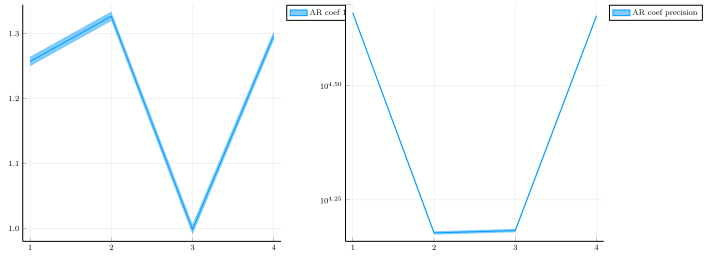

In [43]:
mθs = result.mθs
mγs = result.mγs

dimension(n) = (x) -> map(i -> i[n], x)
index = 1
p1 = plot(mean.(mθs[end]) |> dimension(index), ribbon = sqrt.(var.(mθs[end]) |> dimension(index)), label="AR coef $(index)")
# plot!([coefs_set[state][index] for state in real_states], label="generated coefs")
p2 = plot(mean.(mγs[end]), ribbon = std.(mγs[end]), yscale = :log10, label="AR coef $(precision)")
# plot!([prec_set[state] for state in real_states], label="generated coefs")

plot(p1, p2, size = (900, 400))

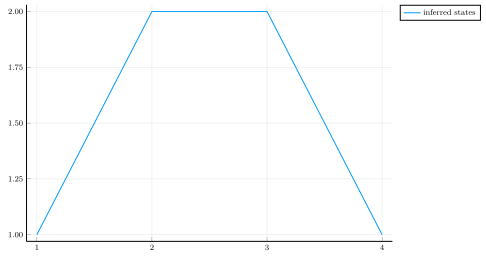

In [44]:
mzs = result.mzs
plot(mean.(mzs[end][1:end]), label="inferred states")


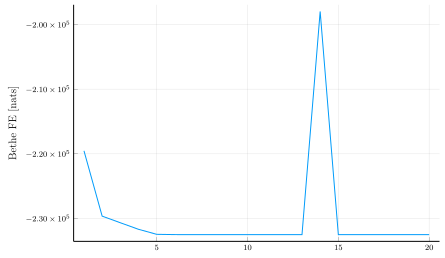

In [45]:
mfe = result.mfe
plot(mfe[1:end], label=:none, ylabel="Bethe FE [nats]")

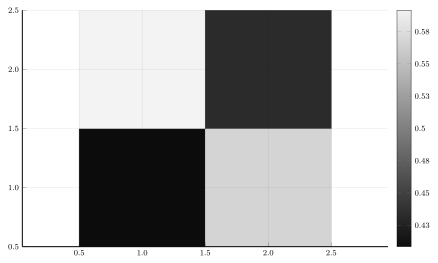

In [46]:
xs = collect(1:n_states)
ys = collect(1:n_states)
p1 = heatmap(xs, ys, mean(result.mA[end]), aspect_ratio = 1,color=:grays)

In [48]:
using PGFPlotsX
using Colors
pgfplotsx()
push!(PGFPlotsX.CUSTOM_PREAMBLE, raw"\usepgfplotslibrary{fillbetween}");

In [49]:
using Base.Iterators
states = collect(flatten(map(e -> repeated(e, l_slice), round.(mean.(result.mzs[end][1:end])))))

60000-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

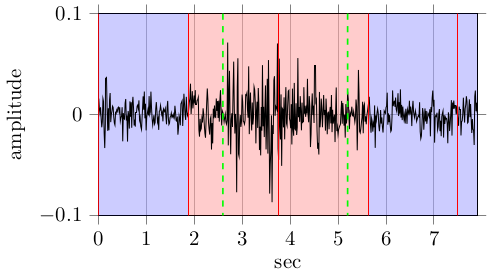

In [57]:
segment_sec = l_slice/fs

plt_acoustic = @pgf Axis({
    yticklabel_style={
    "/pgf/number format/fixed,
    /pgf/number format/precision=3"
    },
    legend_pos="north east",
    grid="major",
    yminorgrids=true,
    xmin=0.0,
    xtick_distance=1.0,
    xmax=7.9,
    ymax=0.1,
    ymin=-0.1,
    tick_align="outside",
    each_nth_point=100,
    scaled_y_ticks = false,
    ytick_distance=0.1, grid = "major", style={"ultra thin"},
    width="8cm", height="5cm",
    xlabel="sec", ylabel="amplitude",
},
Plot(
    {no_marks,color="black",fill_opacity=0.0, mark_size=4.0, mark="*"},
    Coordinates(collect(0:1/fs:length(signal)/fs)[1:end], vec(signal))
    ),
    VLine({color="green", "dashed", "thick"}, 2.6),
    VLine({color="green", "dashed", "thick"}, 5.2),
    VLine({"name path=a", color="red", "thin"}, 0*segment_sec),
    VLine({"name path=b", color="red", "thin"}, 1*segment_sec),
    VLine({"name path=c", color="red", "thin"}, 2*segment_sec),
    VLine({"name path=d", color="red", "thin"}, 3*segment_sec),
    VLine({"name path=e", color="red", "thin"}, 4*segment_sec),
    VLine({"name path=f", color="red", "thin"}, 5*segment_sec),
    Plot({ thick, color = "blue", fill = "blue", opacity = 0.2 },
            raw"fill between [of=a and b]"),
    Plot({ thick, color = "red", fill = "red", opacity = 0.2 },
            raw"fill between [of=b and c]"),
    Plot({ thick, color = "red", fill = "red", opacity = 0.2 },
            raw"fill between [of=c and d]"),
    Plot({ thick, color = "blue", fill = "blue", opacity = 0.2 },
            raw"fill between [of=d and e]"),
    Plot({ thick, color = "blue", fill = "blue", opacity = 0.2 },
            raw"fill between [of=e and f]")
)

In [56]:
pgfsave("WAV_acoustics.svg", plt_acoustic)